In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import glob

In [2]:

#importing the csv files of US states from states0 - states9
#glob () can open multiple files by using regex matching to get the filenames

state = glob.glob("states*.csv") 

states_list = [] # to store the states in a list

# This code goes through any file that starts with 'file' and has an extension of .csv. It opens each file, reads the data into a DataFrame, and then concatenates all of those DataFrames together.

In [3]:
state = glob.glob("states*.csv") 

states_list = []

for s in state:
    data = pd.read_csv(s) 
    states_list.append(data) 
    
us_states = pd.concat(states_list)



In [4]:

# Display the columns and data types
print(us_states.columns)
print(us_states.dtypes)

# observe the dataframe
us_states.head()

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')
Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object


,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36",2341093M_2489527F
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"$70,354.74",384160M_349215F
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"$54,207.82",3299088M_3342840F
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"$41,935.63",1451913M_1506295F
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"$67,264.78",19087135M_19334329F


In [5]:

# selecting the Income column from the data frame and using regex to convert the column into a format that is ready for conversion into a numerical type
for index in range(0,len(us_states['Income'])):
  
    string = str(us_states['Income'].iat[index])
    replace_dollor = string.replace('$', ' ') # replacing the $ character 
    replace_comma = replace_dollor.replace(',', '')
    us_states['Income'].iat[index] = replace_comma

# creating the Income column into a dataframe
us_states["Income"] = pd.to_numeric(us_states['Income'])
us_states["Income"]

for index in range(0,len(us_states["Income"])):
    string = str(us_states['Income'].iat[index])
    replace_dollor = string.replace('$', '')
    replace_comma = replace_dollor.replace(',', '')
    us_states['Income'].iat[index] = replace_comma

us_states["Income"] = pd.to_numeric(us_states['Income'])
us_states["Income"]

0    43296.36
1    70354.74
2    54207.82
3    41935.63
4    67264.78
5    64657.80
0    64657.80
1    76146.56
2    61827.98
3    75466.36
4    50690.19
5    50811.08
0    50811.08
1    73264.43
2    48017.32
3    59587.05
4    48616.23
5    53017.75
0    53017.75
1    53885.61
2    45285.80
3    44957.99
4    49181.97
5    78765.40
0    78765.40
1    72838.94
2    51201.83
3    62820.83
4    38909.92
5    49763.99
0    49763.99
1    47645.68
2    55916.47
3    55526.53
4    68728.86
5    76581.08
0    76581.08
1    47329.97
2    64290.75
3    49937.46
4    58188.11
5    49655.25
0    49655.25
1    48100.85
2    54271.90
3    56170.46
4    20720.54
5    59125.27
0    59125.27
1    46296.81
2    51805.41
3    47328.08
4    55874.52
5    63488.92
0    63488.92
1    55602.97
2    72866.01
3    64493.77
4    41437.11
5    53898.89
Name: Income, dtype: float64

In [6]:

# Now observe the GenderPop column
us_states['GenderPop'].head()

Men = [] # list to store the men gender
Women = [] # list to store the women gender

#separate this into two columns, Men column, and Women column
for index in range(0,len(us_states["GenderPop"])):

    string = str(us_states['GenderPop'].iat[index])
    gender = string.split('_') # split the column into two
    Men.append(gender[0]) # store the first index[0] of replace into men[] list
    Women.append(gender[1]) # store the second index[1] of replace into women[]

us_states['Men'] = Men # store the list values into a new column called men 
us_states['Women'] = Women # store the list values into new column into women

us_states.head()


,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,2341093M_2489527F,2341093M,2489527F
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,384160M_349215F,384160M,349215F
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,3299088M_3342840F,3299088M,3342840F
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.63,1451913M_1506295F,1451913M,1506295F
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.78,19087135M_19334329F,19087135M,19334329F


In [7]:

# preparing the columns into numerical datatypes 

for index in range(0,len(us_states["Men"])):
    string = str(us_states['Men'].iat[index])
    men_gender = string.replace('M', '') # replacing the character M with empty values(numerical)
    us_states['Men'].iat[index] = men_gender
    
# preparing the columns into numerical datatypes 

for index in range(0,len(us_states["Women"])):
    string = str(us_states['Women'].iat[index])
    women_gender = string.replace('F', '') # replacing the character F with empty values(numerical)
    us_states['Women'].iat[index] = women_gender
    
# converting the dataframe to numerical datatype    
us_states['Men'] = pd.to_numeric(us_states['Men'])
us_states['Women'] = pd.to_numeric(us_states['Women'])

us_states.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,2341093M_2489527F,2341093,2489527.0
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,384160M_349215F,384160,349215.0
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,3299088M_3342840F,3299088,3342840.0
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.63,1451913M_1506295F,1451913,1506295.0
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.78,19087135M_19334329F,19087135,19334329.0


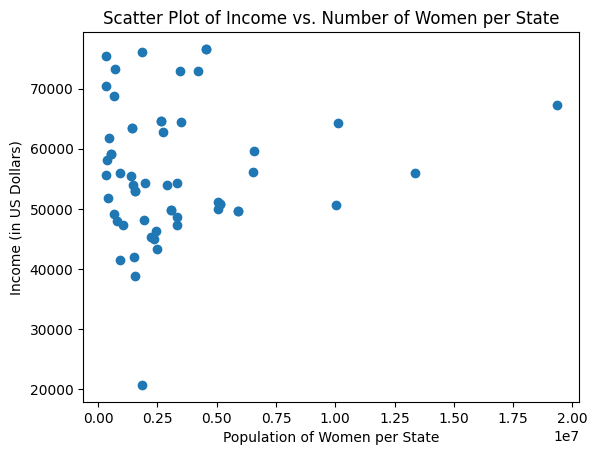

<Figure size 640x480 with 0 Axes>

In [8]:

# observing the relationship between the women and their income in each states
plt.scatter(us_states['Women'], us_states['Income'])
plt.title("Scatter Plot of Income vs. Number of Women per State")
plt.xlabel("Population of Women per State")
plt.ylabel("Income (in US Dollars)")
plt.show()
plt.clf()

In [9]:

#print the column women to check for NAN values
print(us_states['Women'])


0     2489527.0
1      349215.0
2     3342840.0
3     1506295.0
4    19334329.0
5     2630239.0
0     2630239.0
1     1841615.0
2      478041.0
3      340810.0
4    10045763.0
5     5123362.0
0     5123362.0
1      696428.0
2      806083.0
3     6556862.0
4     3333382.0
5     1558931.0
0     1558931.0
1     1453125.0
2     2233145.0
3     2364097.0
4      679019.0
5           NaN
0           NaN
1     3455936.0
2     5038598.0
3     2727005.0
4     1536358.0
5     3081445.0
0     3081445.0
1           NaN
2      939759.0
3     1390901.0
4      670717.0
5     4561386.0
0     4561386.0
1     1051703.0
2    10131373.0
3     5049925.0
4      353677.0
5     5913084.0
0     5913084.0
1     1942789.0
2     1990780.0
3     6534215.0
4     1869213.0
5      543273.0
0      543273.0
1     2455167.0
2      419713.0
3     3331859.0
4    13367298.0
5     1444150.0
0     1444150.0
1      318031.0
2     4195682.0
3     3497739.0
4      937789.0
5     2890732.0
Name: Women, dtype: float64


In [10]:

# fill the NAN with the difference between the TotalPop and the Men comumn for each state.
us_states['Women'] = us_states['Women'].fillna(us_states['TotalPop'] - us_states['Men'])
print(us_states['Women'])


0     2489527.0
1      349215.0
2     3342840.0
3     1506295.0
4    19334329.0
5     2630239.0
0     2630239.0
1     1841615.0
2      478041.0
3      340810.0
4    10045763.0
5     5123362.0
0     5123362.0
1      696428.0
2      806083.0
3     6556862.0
4     3333382.0
5     1558931.0
0     1558931.0
1     1453125.0
2     2233145.0
3     2364097.0
4      679019.0
5     3057895.0
0     3057895.0
1     3455936.0
2     5038598.0
3     2727005.0
4     1536358.0
5     3081445.0
0     3081445.0
1      504536.0
2      939759.0
3     1390901.0
4      670717.0
5     4561386.0
0     4561386.0
1     1051703.0
2    10131373.0
3     5049925.0
4      353677.0
5     5913084.0
0     5913084.0
1     1942789.0
2     1990780.0
3     6534215.0
4     1869213.0
5      543273.0
0      543273.0
1     2455167.0
2      419713.0
3     3331859.0
4    13367298.0
5     1444150.0
0     1444150.0
1      318031.0
2     4195682.0
3     3497739.0
4      937789.0
5     2890732.0
Name: Women, dtype: float64


In [11]:

# check for duplicates in the dataframe
us_states.duplicated(subset = us_states.columns[1:])
# drop the duplicates 

census = us_states.drop_duplicates(subset = us_states.columns[1:])
census

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,2341093M_2489527F,2341093,2489527.0
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,384160M_349215F,384160,349215.0
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,3299088M_3342840F,3299088,3342840.0
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.63,1451913M_1506295F,1451913,1506295.0
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.78,19087135M_19334329F,19087135,19334329.0
5,5,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,64657.80,2648667M_2630239F,2648667,2630239.0
1,1,Connecticut,3593222,15.60%,67.68%,10.35%,0.13%,4.02%,0.02%,76146.56,1751607M_1841615F,1751607,1841615.0
2,2,Delaware,926454,8.82%,64.63%,20.74%,0.26%,3.27%,NaN,61827.98,448413M_478041F,448413,478041.0
3,3,District of Columbia,647484,9.17%,33.10%,51.78%,0.20%,3.38%,0.03%,75466.36,306674M_340810F,306674,340810.0
4,4,Florida,19645772,21.34%,59.08%,15.17%,0.21%,2.28%,0.05%,50690.19,9600009M_10045763F,9600009,10045763.0


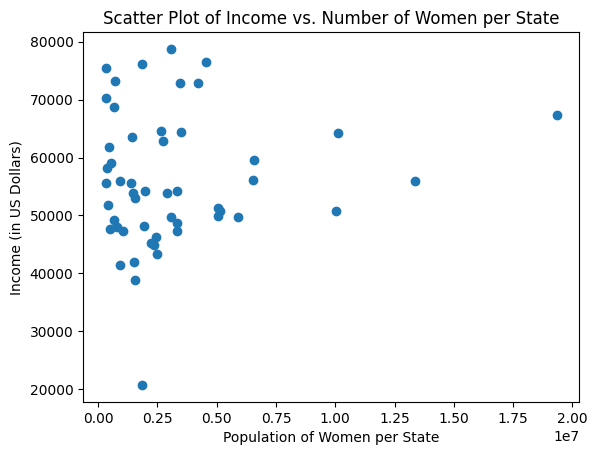

<Figure size 640x480 with 0 Axes>

In [12]:
# observe the plot again
plt.scatter(census['Women'], census['Income'])
plt.title("Scatter Plot of Income vs. Number of Women per State")
plt.xlabel("Population of Women per State")
plt.ylabel("Income (in US Dollars)")
plt.show()
plt.clf()

In [13]:


# Histograms of Races
# Display the columns of the dataframe
census.columns

for race in ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']:
    for index in range(0,len(us_states)):    
        string = str(us_states[race].iat[index])
        hist_race = string.replace('%', '')
        if (hist_race == "nan"):
            hist_race = ""
        us_states[race].iat[index] = hist_race
    us_states[race] = pd.to_numeric(us_states[race])
    
us_states['Pacific'] = us_states['Pacific'].fillna(100 - us_states['Hispanic'] - us_states['White'] - us_states['Black'] - us_states['Native'] - us_states['Asian'])

census = us_states.drop_duplicates(subset = us_states.columns[1:])
census


,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,2341093M_2489527F,2341093,2489527.0
1,1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,384160M_349215F,384160,349215.0
2,2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,3299088M_3342840F,3299088,3342840.0
3,3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,1451913M_1506295F,1451913,1506295.0
4,4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,19087135M_19334329F,19087135,19334329.0
5,5,Colorado,5278906,20.78,69.90,3.55,0.57,2.66,2.54,64657.80,2648667M_2630239F,2648667,2630239.0
1,1,Connecticut,3593222,15.60,67.68,10.35,0.13,4.02,0.02,76146.56,1751607M_1841615F,1751607,1841615.0
2,2,Delaware,926454,8.82,64.63,20.74,0.26,3.27,2.28,61827.98,448413M_478041F,448413,478041.0
3,3,District of Columbia,647484,9.17,33.10,51.78,0.20,3.38,0.03,75466.36,306674M_340810F,306674,340810.0
4,4,Florida,19645772,21.34,59.08,15.17,0.21,2.28,0.05,50690.19,9600009M_10045763F,9600009,10045763.0


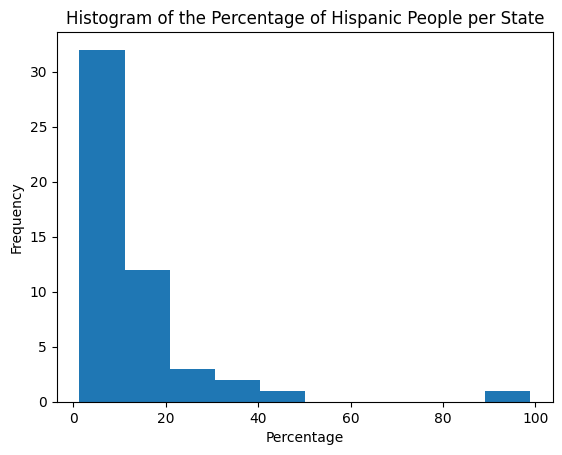

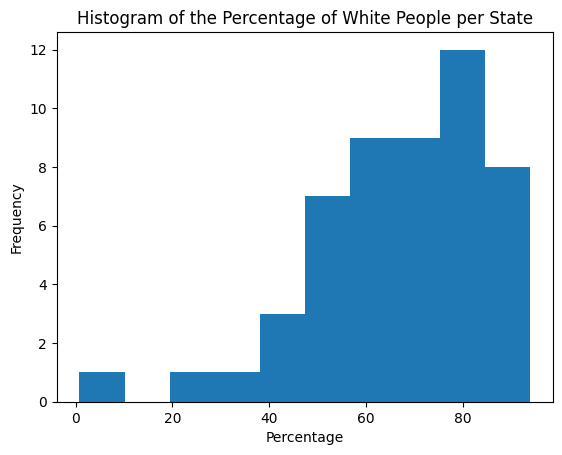

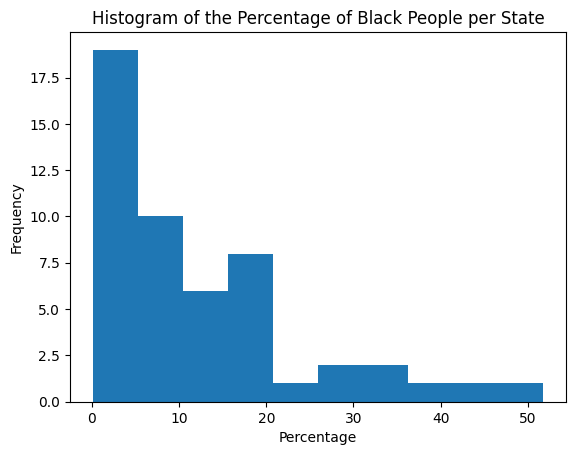

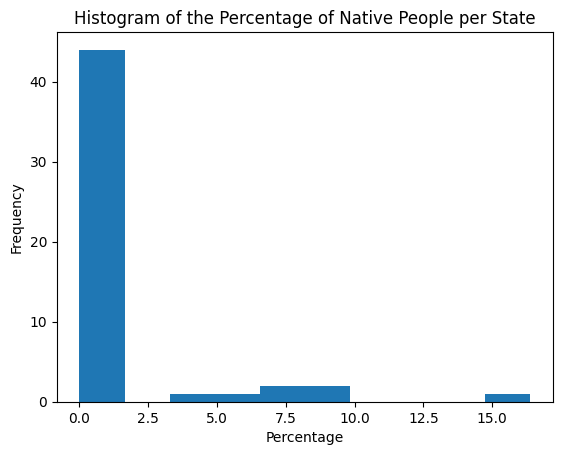

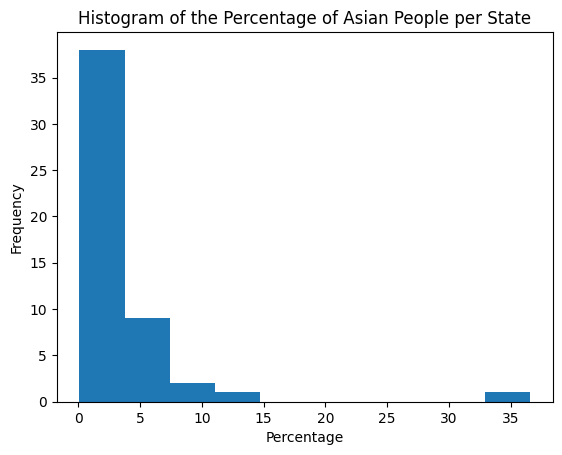

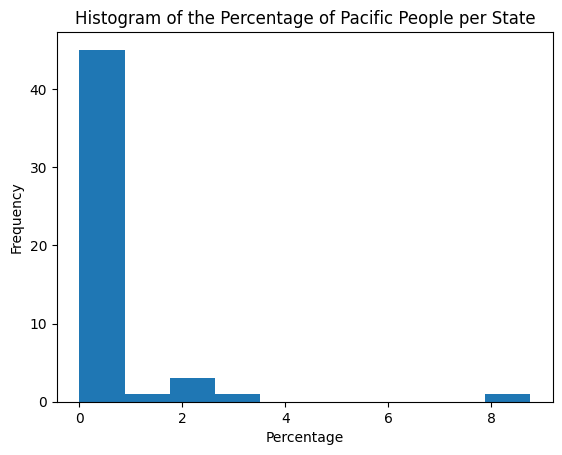

<Figure size 640x480 with 0 Axes>

In [14]:

for race in ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']:
    plt.hist(census[race])
    plt.title("Histogram of the Percentage of {} People per State".format(race))
    plt.xlabel("Percentage")
    plt.ylabel("Frequency")
    plt.show()
    plt.clf()